MODULE 2 | LESSON 1

---


# Financial Asset Data

|  |  |
|:---|:---|
|**Reading Time** |  60 minutes |
|**Prior Knowledge** | Basic Python, Algebra|
|**Keywords** | Stock, Bitcoin, Bond Prices, ETFs, Simple Returns, Analyzing and Charting Data in Python |

---


*For the first lesson of this module, we will recap some of the concepts you learned during Financial Markets. We'll examine stocks, bonds, and cryptocurrency prices during this lesson. Finally, we will also demonstrate how to pull price data from Python and do some basic price analysis of equities, Bitcoin, and bond data. Then, we'll expand on what we learned with a few custom volatility metrics, along with how to program them in Python. We'll also focus on the risk, or volatility of returns, of financial assets.*

In [25]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yfin

from datetime import date

pd.options.display.float_format = "{:,.6f}".format

## **1. Pull Equities Data for Amazon and Ford, along with Bitcoin Data**

The following code pulls five years of equity price data for Ford and Amazon along with the daily Bitcoin prices over the same time period. The reason we chose Ford and Amazon here is to give examples from different sectors. While Amazon has been around for a while now, it still represents a newer, popular tech stock while Ford is very much part of the old guard, trading publicly since 1956.

This code snippet uses the `yfinance` library to download historical stock data for Amazon (AMZN), Ford (F), and Bitcoin (BTC-USD) and then adjusts the Amazon prices for the recent stock split.


In [26]:
# Starting and end dates
start = datetime.date(2019, 8, 1)
end = datetime.date(2024, 8, 1)

# Get Amazon, Ford and Bitcoin data
df = yfin.download(["AMZN", "F", "BTC-USD"], start, end, auto_adjust = False)["Adj Close"]

# Convert DataFrame index to timezone-aware (UTC)
df.index = df.index.tz_localize('UTC')

# Define split date as a timezone-aware timestamp
split_date = pd.Timestamp(datetime.date(2022, 6, 6)).tz_localize('UTC')  # Date of the stock split
split_ratio = 20

# Adjust AMZN prices only before the split date
for i in range(len(df["AMZN"])):
  if df["AMZN"].index[i] < split_date:
    df.loc[df["AMZN"].index[i], "AMZN"] = df.loc[df["AMZN"].index[i], "AMZN"] * split_ratio
df

[*********************100%***********************]  3 of 3 completed


Ticker,AMZN,BTC-USD,F
Date,,,
2019-08-01 00:00:00+00:00,"1,855.319977","10,399.668945",7.107781
2019-08-02 00:00:00+00:00,"1,823.240051","10,518.174805",7.084878
2019-08-03 00:00:00+00:00,NaN,"10,821.726562",NaN
2019-08-04 00:00:00+00:00,NaN,"10,970.184570",NaN
2019-08-05 00:00:00+00:00,"1,765.130005","11,805.653320",7.046706
...,...,...,...
2024-07-27 00:00:00+00:00,NaN,"67,813.335938",NaN
2024-07-28 00:00:00+00:00,NaN,"68,255.867188",NaN
2024-07-29 00:00:00+00:00,183.199997,"66,819.914062",10.357336


Please note that there are lines that specifically relate to the Amazon stock split that occurred on June 6, 2022.

 - `split_date = pd.Timestamp(datetime.date(2022, 6, 6)).tz_localize('UTC')`: This line stores the date when the Amazon stock split happened.
 - `split_ratio = 20`: This line stores the ratio of the stock split, which was 20-for-1 in this case.

**What does a 20-for-1 stock split mean?**
A stock split is when a company increases the number of outstanding shares of its stock by issuing more shares to current shareholders. In a 20-for-1 split, for every share an investor owns, they receive 19 additional shares. This doesn't change the total value of the investor's holdings, but it does decrease the price per share.

**Why do we adjust for the stock split?**
When analyzing historical stock data, it's important to adjust for stock splits to avoid inconsistencies. If we don't adjust, it would look like the stock price suddenly dropped on the split date, which could lead to inaccurate analysis.

In the code, we use split_date and split_ratio to adjust the historical prices of Amazon before the split date. We divide the prices by the split ratio (20 in this case) to reflect the change in the number of shares. This ensures that the historical data is consistent and comparable across the entire date range.

If you are analyzing a different stock or using a different dataset, make sure to check if any stock splits occurred and adjust the code accordingly.


### **1.1 Taking a Look at the Data**

Unless you're extremely familiar with the dataset you're working with, it's almost always a good idea to look at the first few rows of data to get an idea of how it looks. We can accomplish this using the *head()* method. You can pass a numerical parameter in this (for example, 10), and it will return the top 10 rows of the data set. By default, it returns the first five.

In [27]:
df.head(10)

Ticker,AMZN,BTC-USD,F
Date,,,
2019-08-01 00:00:00+00:00,"1,855.319977","10,399.668945",7.107781
2019-08-02 00:00:00+00:00,"1,823.240051","10,518.174805",7.084878
2019-08-03 00:00:00+00:00,NaN,"10,821.726562",NaN
2019-08-04 00:00:00+00:00,NaN,"10,970.184570",NaN
2019-08-05 00:00:00+00:00,"1,765.130005","11,805.653320",7.046706
2019-08-06 00:00:00+00:00,"1,787.830048","11,478.168945",7.237567
2019-08-07 00:00:00+00:00,"1,793.399963","11,941.968750",7.275742
2019-08-08 00:00:00+00:00,"1,832.890015","11,966.407227",7.298647
2019-08-09 00:00:00+00:00,"1,807.579956","11,862.936523",7.214666


Other methods are `df.tail(n)` with an argument indicating the last `n` rows of dataset or just running the `df` command to get the first 5 rows and last 5 rows of the dataset.

In our example above, right off the bat, we can see that it was a smart idea to take a look at this data first. Can you guess why we have null values here?

The answer is that simple equities only trade Monday through Friday, which means there's no price data available on the weekends. Bitcoin does not have this same characteristic as it trades seven days a week, which is why 2019-08-03 and 2019-08-04 are populated in this case.

### **1.2 Digging a Little Deeper into the Data**

We can use the pandas *describe()* method to show summary stats of our data. We can see that Bitcoin has a much higher number of observations (count) than our two stocks, which, as just discussed, is because stocks are not traded on weekends. The other summary stats are relatively basic, like mean and standard deviation along with showing minimum, maximum, and a few quantiles. This might be something you're interested in, but it is hard to compare these investments with this data alone since each asset had a different starting price five years ago. For a better comparison, we will have to examine returns in more depth in an upcoming lesson.

In [28]:
df.describe()

Ticker,AMZN,BTC-USD,F
count,"1,258.000000","1,827.000000","1,258.000000"
mean,"1,660.568330","30,854.084965",9.823950
std,"1,409.699586","18,350.840533",2.989040
min,81.820000,"4,970.788086",3.164624
25%,135.307495,"13,602.354004",7.132037
50%,"1,807.709961","28,033.562500",10.371441
75%,"3,161.874924","43,593.824219",11.503030
max,"3,731.409912","73,083.500000",19.979620


### **1.3 Charting Prices over 2023**

If we ever want to get a quick plot of the DataFrame's data, we can use the aptly named `plot()` method. As shown below, to chart the 2023 returns of these three assets:

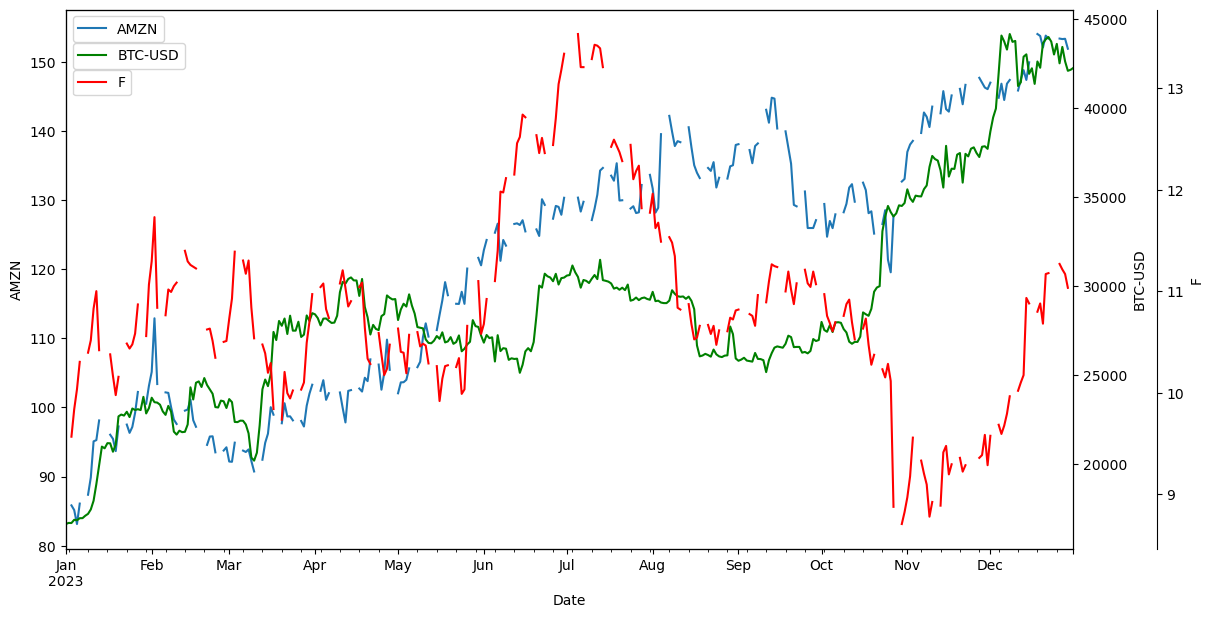

In [29]:
# Create the figure.
# We want a plot where the three assets have the same index (x-axis) but different scale (y-axis)
fig = plt.figure(figsize=(13, 7))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Plot the data
df["2023-01-01":"2023-12-31"].plot(ax=ax1, y='AMZN', legend=True)
df["2023-01-01":"2023-12-31"].plot(ax=ax2, y='BTC-USD', legend=True, color='g')
df["2023-01-01":"2023-12-31"].plot(ax=ax3, y='F', legend=True, color='r')

# We set the labels to the axes
ax1.set_ylabel('AMZN')
ax2.set_ylabel('BTC-USD')
ax3.set_ylabel('F')
ax3.spines['right'].set_position(('outward', 60))

# Set position of legends
ax1.legend(['AMZN'], loc='upper left')
ax2.legend(['BTC-USD'], loc='upper left', bbox_to_anchor=(0, 0.95))
ax3.legend(['F'], loc='upper left', bbox_to_anchor=(0, 0.9))

plt.show()


The above code and chart demonstrate how we can easily pass in a date range to the plot method in order to chart a subset of the data. If no date range is supplied, by default, the plot will encapsulate the entire dataset. This code snippet creates a figure with three subplots that share the same x-axis (date) but have different y-axes to plot the prices of Amazon (AMZN), Bitcoin (BTC-USD), and Ford (F) for the year 2023. This approach allows us to visualize the price trends of three different assets with varying scales on the same plot. However, the chart also illustrates why using price alone is not ideal for comparing two assets. The scale of Bitcoin's price versus a low-price stock like Ford makes it very hard to compare the two when deciding which stock is better to invest in.



## **2. Calculating Return on Investment**

If we invested **\$1,000** into each of these assets five years ago, how much money would we have today? To answer this question, we first need to determine how many shares of each stock we could buy with **\$1,000** at the start of our date range. For the purposes of this exercise, we will use **01/08/2019** as our starting point because i


From our data above, we can see the starting prices of AMZN, F, and Bitcoin. We can also have the values of the first row for each ticker stored in individual variables, which we can then use for further calculations or analysis. We will do this in the following code. We also need to divide **\$1,000** by each of these numbers to see how many shares we will have:

In [30]:
# Access the first row of the DataFrame
first_row = df.iloc[0]

# Assign price values to variables
amzn_price = first_row["AMZN"]
f_price = first_row["F"]
btc_price = first_row["BTC-USD"]

# Print price values
print("Purchase price of AMZN:", np.round(amzn_price, 3))
print("Purchase price of F:", np.round(f_price, 3))
print("Purchase price of BTC-USD:", np.round(btc_price, 3))
print(" - - - - - - - - - -")

# Divide $1,000 by each of price values to get number of shares
amzn_shares = 1000 / amzn_price
f_shares = 1000 / f_price
btc_shares = 1000 / btc_price

# Print number of shares for each ticker
print("Number of shares of AMZN:", np.round(amzn_shares, 3))
print("Number of shares of F:", np.round(f_shares, 3))
print("Number of shares of BTC-USD:", np.round(btc_shares, 3))


Purchase price of AMZN: 1855.32
Purchase price of F: 7.108
Purchase price of BTC-USD: 10399.669
 - - - - - - - - - -
Number of shares of AMZN: 0.539
Number of shares of F: 140.691
Number of shares of BTC-USD: 0.096


It's a relatively recent phenomenon that retail brokers offer fractional shares, but this tends to be the case nowadays for most commonly used brokers. For this exercise, we will assume we can have fractional shares.

Now, to determine how much money we would have today, we look at the most recent date in our dataset (31/07/2024), get the prices of each asset, and multiply our number of shares by this number. We can find this by looking at the bottom of our dataset in using the *tail()* method. Alternatively, we can also program asset value computations:

In [31]:
# Get last date values from df
last_row = df.iloc[-1]

# Assign end date price values to variables
amzn_price_end = last_row["AMZN"]
f_price_end = last_row["F"]
btc_price_end = last_row["BTC-USD"]

# Print end date prices
print("End price of AMZN:", np.round(amzn_price_end, 3))
print("End price of F:", np.round(f_price_end, 3))
print("End price of BTC-USD:", np.round(btc_price_end, 3))
print(" - - - - - - - - - -")

# Compute end date values for each ticker
amzn_value = amzn_price_end * amzn_shares *20  # need 20 times multiple due to stock split
f_value = f_price_end * f_shares
btc_value = btc_price_end * btc_shares

# Print end date values
print("Holding value of AMZN:", np.round(amzn_value, 3))
print("Holding value of F:", np.round(f_value, 3))
print("Holding value of BTC-USD:", np.round(btc_value, 3))


End price of AMZN: 186.98
End price of F: 10.179
End price of BTC-USD: 64619.25
 - - - - - - - - - -
Holding value of AMZN: 2015.609
Holding value of F: 1432.036
Holding value of BTC-USD: 6213.587


The investment spend was \$1000 for each ticker. Now based on the computation results above, it seems that our investments have performed differently:

 - AMZN: Our Amazon investment has more than doubled, indicating a significant gain.
 - F: Our Ford investment has also grown, showing a decent return.
 - BTC-USD: Our Bitcoin investment has increased by more than six times, suggesting a substantial profit.

However, it's important to remember that these are just the final values and don't tell the whole story. To get a clearer picture of investment performance, we need to consider:
 - Timeframe: We need to know the timeframe of this investment to assess the returns accurately. Short-term fluctuations are normal, while long-term trends are more indicative of overall performance.
 - External Factors: Market volatility, economic conditions, and company-specific news can significantly impact stock prices.
 - Investment Strategy: Your individual investment goals and risk tolerance should guide your decisions.

These assets were relatively easy to compare here since we started with \\$1,000 in each. If we had started with different values, we would need to calculate the returns for an apples-to-apples comparison. In a future lesson, we will go over simple and log returns, but for convenience, we will use simple returns:

Simple Returns Formula

$$R_{simple} = \frac{p_{_1} - p_{_0}}{p_{_0}}$$

where $p_{_1}$ = final value, $p_{_0}$ = initial value

This will be easy in our case since \$1,000 is the initial value in all three situations.

In [32]:
# Compute simple returns
amzn_return = (amzn_value - 1000) / 1000
f_return = (f_value - 1000) / 1000
btc_return = (btc_value - 1000) / 1000

# Print the returns
print("Simple return of AMZN:", np.round(amzn_return * 100, 3), "%")
print("Simple return of F:", np.round(f_return * 100, 3), "%")
print("Simple return of BTC-USD:", np.round(btc_return * 100, 3), "%")


Simple return of AMZN: 101.561 %
Simple return of F: 43.204 %
Simple return of BTC-USD: 521.359 %


Bitcoin's return here is off the charts compared to the other two assets. Bitcoin is a relatively new — some would even say riskier — asset than the other two. Higher risk equals higher potential for rewards, and thus far, investing in Bitcoin has paid off handsomely.


##  **3. Comparing Equities and Bitcoin to Bonds**

Let's introduce one more asset class here: bonds. As you recall from the Financial Markets class, bonds not only have the return of principal, but they also return a coupon, usually annually or quarterly. To simplify things, we will use an exchange-traded fund (ETF), which tracks bonds. The ETF is the Vanguard Long-Term Bond Index Fund ETF or BLV for short. This fund intends to track the performance of the Bloomberg Barclays U.S. Long Government/Credit Float Adjusted Index. This index includes investment grade corporate, U.S. government, and international dollar-denominated bonds that have maturities greater than 10 years. At least 80% of the fund's total assets will be invested in bonds held in the index mentioned above (Vanguard).

The following code snippet will pull BLV data and join it with our current DataFrame, df.

In [33]:
df = df.join(yfin.download(["BLV"], start, end, auto_adjust = False)["Adj Close"].tz_localize('UTC'))
#df.rename(columns={"Adj Close": "BLV"}, inplace=True)
df

[*********************100%***********************]  1 of 1 completed


Ticker,AMZN,BTC-USD,F,BLV
Date,,,,
2019-08-01 00:00:00+00:00,"1,855.319977","10,399.668945",7.107781,77.323601
2019-08-02 00:00:00+00:00,"1,823.240051","10,518.174805",7.084878,77.864983
2019-08-03 00:00:00+00:00,NaN,"10,821.726562",NaN,NaN
2019-08-04 00:00:00+00:00,NaN,"10,970.184570",NaN,NaN
2019-08-05 00:00:00+00:00,"1,765.130005","11,805.653320",7.046706,78.531898
...,...,...,...,...
2024-07-27 00:00:00+00:00,NaN,"67,813.335938",NaN,NaN
2024-07-28 00:00:00+00:00,NaN,"68,255.867188",NaN,NaN
2024-07-29 00:00:00+00:00,183.199997,"66,819.914062",10.357336,69.508568


### **3.1 Calculate Log Returns, Remove Unused Columns, and Drop Nulls**

Before computing returns, we need to remove the nulls for the weekend dates.

In [34]:
# In order to calculate the returns of the stocks, we need to drop the NA rows.
returns_stocks_BLV = df[['AMZN', 'F', 'BLV']].dropna().pct_change()

# Crypto is traded 24/7
returns_BTC = df[['BTC-USD']].pct_change()

# We broadcast the index of crypto on the stocks in order to join the datasets having NaN for weekends within stocks and BLV columns
returns_stocks = returns_stocks_BLV.reindex(returns_BTC.index)
returns = returns_BTC.join(returns_stocks_BLV, how = 'outer')[1:]
returns


Ticker,BTC-USD,AMZN,F,BLV
Date,,,,
2019-08-02 00:00:00+00:00,0.011395,-0.017291,-0.003222,0.007002
2019-08-03 00:00:00+00:00,0.028860,NaN,NaN,NaN
2019-08-04 00:00:00+00:00,0.013719,NaN,NaN,NaN
2019-08-05 00:00:00+00:00,0.076158,-0.031872,-0.005388,0.008565
2019-08-06 00:00:00+00:00,-0.027740,0.012860,0.027085,0.006694
...,...,...,...,...
2024-07-27 00:00:00+00:00,-0.001454,NaN,NaN,NaN
2024-07-28 00:00:00+00:00,0.006526,NaN,NaN,NaN
2024-07-29 00:00:00+00:00,-0.021038,0.003836,-0.016086,0.003785


### **3.2 Show Summary Stats for the Returns**

In [35]:
returns.describe()

Ticker,BTC-USD,AMZN,F,BLV
count,"1,826.000000","1,257.000000","1,257.000000","1,257.000000"
mean,0.001579,0.000032,0.000671,-0.000034
std,0.033707,0.034772,0.027760,0.009179
min,-0.371695,-0.949003,-0.183614,-0.075170
25%,-0.013480,-0.011077,-0.013606,-0.005253
50%,0.000234,0.000554,0.000000,0.000572
75%,0.015996,0.012220,0.014212,0.005206
max,0.187465,0.135359,0.234414,0.049138


### **3.3 Converting Daily Returns to Annual**

In [36]:
(returns.describe()[["BTC-USD", "F"]])

Ticker,BTC-USD,F
count,"1,826.000000","1,257.000000"
mean,0.001579,0.000671
std,0.033707,0.027760
min,-0.371695,-0.183614
25%,-0.013480,-0.013606
50%,0.000234,0.000000
75%,0.015996,0.014212
max,0.187465,0.234414


Since we are using simple returns, in order to properly annualize them, we will use the geometric mean:


$$
R_{\text{Geom_Mean}} = \left ( \prod_{i=1}^{N} \left ( 1  + r_{i} \right ) \right )^{\frac{1}{N}}- 1
$$

Then, the annualized returns will be given by:

$$
R_{\text{Annaulized_Returns}} = \left ( R_{\text{Geom_Mean}} + 1 \right )^{252 \text{ or } 365} - 1
$$



In [37]:
#Annualize BTC-USD with 365 trading days
(np.prod(returns_BTC + 1, axis=0) ** (1/len(returns_BTC))) ** (365) - 1


Ticker
BTC-USD   0.440439
dtype: float64

In [38]:
#Annualize stocks with 252 trading days
(np.prod(returns_stocks_BLV + 1, axis=0) ** (1/len(returns_stocks_BLV))) ** (252) - 1

Ticker
AMZN   -0.368522
F       0.074584
BLV    -0.018936
dtype: float64

We can run the same analysis on BLV as we did on the above stocks to get the total simple return over a five-year period using a slightly different method. This time, we'll calculate the simple return rate and then just multiply \$1,000 initial investment by 1 + `returnRate`.

In [39]:
# Get innitial and end prices from df
blv_price = df.iloc[0]["BLV"]
blv_price_end = df.iloc[-1]["BLV"]

# Compute simple return rate
blv_return_rate = (blv_price_end - blv_price) / blv_price
print("Simple return rate of BLV:", np.round(blv_return_rate * 100, 3), "%")

# Compute total simple return
total_simple_return = 1000 * (1 + blv_return_rate)
print("Total simple return of BLV: $", np.round(total_simple_return, 3))


Simple return rate of BLV: -9.103 %
Total simple return of BLV: $ 908.975


This output indicates that the investment in BLV has experienced a negative simple return of -9.103%. This means we've lost approximately 9.1% of our initial investment in BLV.

If we started with 1,000 USD, after five years, we would've ended up with (1 - 9.103) * 1000 = 908.97 USD.

This is a much lower return than what we would've gotten with Ford, Amazon, or Bitcoin. This is to be expected for the most part as bonds return a quarterly/annual coupon along with returning the principal. For this reason, bonds (especially government bonds) are considered safer assets than stocks or cryptocurrencies. One major thing to consider is if a company goes bankrupt, you may not get your principal back in a bond. That being said, the same goes for stocks. Bondholders also have less credit risk than stockholders: if you own a bond in Ford and your friend owns Ford stock, but Ford declares bankruptcy tomorrow, the bondholder will be paid off first in the bankruptcy proceedings and the equity owner will only get what's left over, making bonds a safer investment.

The downside to this is that it's hard to achieve the level of total returns that a stock or cryptocurrency can achieve with a bond. There is a risk-reward tradeoff. Think back to the reading in this lesson for a moment. What we just discussed here is mentioned in the reading comparing a high-variance investment to a low-variance investment. What you choose is entirely up to your risk preferences. Always take into consideration the risk-reward tradeoff.

Here are some points to consider:

 - **Time Horizon:** The simple return doesn't account for the investment timeframe. Short-term losses are not unusual, and it's important to evaluate investments over a longer period to get a more accurate picture of their performance.
 - **Benchmarking:** Compare the return of BLV to a relevant benchmark, such as a broad market index like the S&P 500, to assess its relative performance.
 - **Investment Strategy:** Consider your overall investment goals and risk tolerance when evaluating the performance of BLV.

Remember that simple returns are just one way to measure investment performance. For a more comprehensive analysis, consider factors like dividends, taxes, liquidity, regulation, credit risk, volatility, and the time value of money.

## **4. Future Value of an Investment**

The S&P 500 consists of 500 large-cap companies. The index calculates weights according to market capitalization. This weighting is different from that in the Dow Jones Industrial Average, which is price weighted. The companies that make up this index are chosen by a committee, but companies must fit specific criteria before being included (Standard & Poor's):

* Market capitalization must be greater than or equal to \\$18 billion.
* Annual dollar value traded to float-adjusted market capitalization is greater than 1.0.
* The minimum monthly trading volume is 250,000 shares in each of the six months leading up to the evaluation date.
* The company must be publicly listed on either the New York Stock Exchange (NYSE), including NYSE Arca or NYSE American, or NASDAQ (NASDAQ Global Select Market, NASDAQ Select Market or the NASDAQ Capital Market).
* The company should be from the U.S.
* Securities that are ineligible for inclusion in the index are limited partnerships, master limited partnerships and their investment trust units, OTC Bulletin Board issues, closed-end funds, exchange-traded funds, exchange-traded notes, royalty trusts, tracking stocks, preferred stock, unit trusts, equity warrants, convertible bonds, investment trusts, American depositary receipts, and American depositary shares.
* Since 2017, companies with dual share classes, like Standard & Poor's, are not added to the index.

This will be used as our proxy for large-cap stocks.

The Russell 2000 is an index that contains 2,000 small-cap companies and is frequently used as a benchmark by small-cap mutual funds for comparison purposes. The Russell 2000 is constructed to provide a barometer for small-cap stocks. It's reconstituted annually to ensure companies from the previous year don't get too large and distort the characteristics of small-caps (Maginn 118).

The Russell 2000 Index will be used as our proxy for small-cap companies.

One way to compare two investment opportunities is to determine the future value of an investment. There are always risks and many assumptions that need to be made when determining future value, especially for a risky investment like a stock. We will begin by using the average daily rate of return of each index to determine expected return. This is a simple way of thinking because it's impossible to say the next 10 years will be the same as the past 10 years, but it is a starting point when comparing investments. We will delve further into more advanced comparison metrics as the course goes on.

**The formula for compound interest is:**

$$FV = PV (1+i)^n$$

where

$FV$ = Future value  </br>
$PV$ = Present value  </br>
$i$ = Periodic interest rate  </br>
$n$ = Number of periods  </br>


### **4.1 Pull 5 years daily price data for S&P 500 and Russell 2000**

We're going to dig deeper into specific equities asset classes and compare them as potential investments. We will start by comparing large cap to small cap stocks using S&P 500 and the Russell 2000 Index.

Throughout this lesson we will build towards a function here which takes a date range and compares two series of returns.


In [40]:
# Uncomment the following lines to pull most recent data (optional)
#start = datetime.date.today()-datetime.timedelta(365*10)
#end = datetime.date.today()
start = datetime.date(2019, 8, 1)
end = datetime.date(2024, 8, 1)

# Get data
prices = yfin.download(["^GSPC", "^RUT"], start, end, auto_adjust = False)["Adj Close"]

# Rename column to make names more intuitive
prices = prices.rename(columns={"^GSPC": "SP500", "^RUT": "Russell2000"})

# Get dataset stats
prices.describe()


[*********************100%***********************]  2 of 2 completed


Ticker,SP500,Russell2000
count,"1,258.000000","1,258.000000"
mean,"4,028.833253","1,865.957234"
std,685.682781,284.232353
min,"2,237.399902",991.159973
25%,"3,502.235046","1,674.337524"
50%,"4,110.745117","1,873.654968"
75%,"4,468.547485","2,067.780090"
max,"5,667.200195","2,442.739990"


In [41]:
# Display first 5 rows
prices.head()


Ticker,SP500,Russell2000
Date,,
2019-08-01,"2,953.560059","1,550.760010"
2019-08-02,"2,932.050049","1,533.660034"
2019-08-05,"2,844.739990","1,487.410034"
2019-08-06,"2,881.770020","1,502.089966"
2019-08-07,"2,883.979980","1,500.689941"


Once again, we can see these datasets have different starting points, so the only way we can do a fair comparison is by comparing returns.

### **4.2 Calculate Log Returns, Remove Unused Columns, and Drop Nulls**

No nulls here for the weekend dates. Since the S&P 500 and the Russell 2000 Index are both stock indices, the weekends are automatically removed. The following code calculates the log returns of these financial assets:

In [42]:
# Calculate log returns
df = np.log(prices) - np.log(prices.shift(1))
df = df.iloc[1:, 0:]
df.head()


Ticker,SP500,Russell2000
Date,,
2019-08-02,-0.007309,-0.011088
2019-08-05,-0.030230,-0.030621
2019-08-06,0.012933,0.009821
2019-08-07,0.000767,-0.000932
2019-08-08,0.018588,0.020734


Log returns are often preferred over simple returns in financial analysis for several reasons:

 - Time additivity: Log returns can be easily added across time to calculate cumulative returns over longer periods.
 - Normality: Log returns tend to be more normally distributed than simple returns, which is a desirable property for statistical modeling.
 - Symmetry: Log returns offer better symmetry than simple returns, especially for smaller changes, which makes them more suitable for certain types of financial analysis.

By calculating log returns, you can perform more sophisticated financial analysis and modeling.

### **4.3 Calculating Future Value of Each Index**

In the following code snippet, we calculate the average annual return for each index using the mean of the daily returns multiplied by 252 (trading days per year). Then, we use these average returns to calculate future values.



In [43]:
# Calculate average annual return over the past 5 years
avg_returns = df.mean() * 252

# Calculate future value for each index
future_value_sp500 = 1000 * np.exp(avg_returns["SP500"] * 5)
future_value_russell2000 = 1000 * np.exp(avg_returns["Russell2000"] * 5)

print("Future Value of SP500:", future_value_sp500)
print("Future Value of Russell2000:", future_value_russell2000)


Future Value of SP500: 1872.5041981875975
Future Value of Russell2000: 1455.0892174400194


Remember that past performance is not indicative of future results. Using the average return of the past 5 years is just one approach, and you should consider other factors and potential risks when making investment decisions.

In our specific case above, since we are calculating the future value over a 5-year period, using the average annual return is likely more suitable and efficient. However, if we were analyzing the short-term fluctuations or risk of the indices, daily returns would be more informative.

Whether it's better to calculate the average daily return or the average annual return depends on the context and how we plan to use the results. Here's a breakdown of the considerations:

 - Comparability: If we want to compare the returns of different assets or investments with varying timeframes, annualized returns are generally more useful. Daily returns can be misleading if the investment periods are not the same.
 - Future Value Calculation: If we're specifically calculating future values, using the average annual return directly in the formula is more straightforward and avoids extra steps.
 - Volatility Analysis: If we're interested in analyzing the volatility or risk of an investment, daily returns might be more relevant as they provide more granular data.

Rewriting the previous code using daily returns is as follows:

In [44]:
# Calculate average daily return over the past 5 years
avg_daily_returns = df.mean()

# Calculate future value for each index (using daily returns and 5 years)
num_days = 252 * 5  # Number of trading days in 5 years
future_value_sp500 = 1000 * np.exp(avg_daily_returns["SP500"] * num_days)
future_value_russell2000 = 1000 * np.exp(avg_daily_returns["Russell2000"] * num_days)

print("Future Value of SP500:", future_value_sp500)
print("Future Value of Russell2000:", future_value_russell2000)


Future Value of SP500: 1872.5041981875975
Future Value of Russell2000: 1455.0892174400194


This approach uses daily returns instead of annualized returns for the future value calculation. Remember that this assumes continuous compounding, which might not be entirely accurate for real-world investments.

The output shows the future value of an initial investment of \$1,000 in both the S&P 500 and Russell 2000 indices after 5 years, based on their average daily returns.

 - S&P500: The future value is approximately \$1,872.50.
 - Russell2000: The future value is approximately \$1,455.09.

While future value is important when comparing investments, we also need to be concerned about how volatile these investment opportunities are. In the next section, we will discuss three different volatility metrics along with how to program them in Python.

## **5. Investment Opportunities: Volatility**

### **5.1 Price Volatility: High-Low**

We will be using the prices DataFrame again to show some simple ways to compare the volatility of certain investments. The first method is comparing the high and low of the index. For this, we use the `max()` and `min()` methods to get the high and low over the duration of the DataFrame by column. From here, we can subtract these from each other to get an idea of the potential volatility of each investment.

In [45]:
prices.max()

Ticker
SP500         5,667.200195
Russell2000   2,442.739990
dtype: float64

In [46]:
prices.min()

Ticker
SP500         2,237.399902
Russell2000     991.159973
dtype: float64

In [47]:
prices.max() - prices.min()

Ticker
SP500         3,429.800293
Russell2000   1,451.580017
dtype: float64

While some may find this useful, we definitely need to improve upon this metric to make it more useful when comparing different investments. How do you think we can do this? Let's try out two ideas.

The first is changing the timeframe slightly. Above, we're looking at the last 5 years of data. Perhaps it would be more useful to analyze more recent data. For this, we will look at the same metric over the last year:

In [48]:
# Slice last year from prices data
end = pd.Timestamp(end).tz_localize(None)  # Remove timezone info

currYear = prices.loc[
    pd.Timestamp(end - datetime.timedelta(365)) : end
]

# Calculate the difference between the maximum and minimum values in the currYear
currYear.max() - currYear.min()


Ticker
SP500         1,549.830078
Russell2000     626.729980
dtype: float64

Even when comparing data over the last 365 days, it seems hard to do a comparison of these two datasets since they have different starting points. One final adjustment to this volatility metric could be to standardize it by dividing by the current price of the index:

In [49]:
(currYear.max() - currYear.min()) / prices.iloc[-1]

Ticker
SP500         0.280649
Russell2000   0.277993
dtype: float64

Volatility is a measure of the dispersion or fluctuation of returns. Higher volatility indicates greater price swings and potentially higher risk. Now that we have the data standardized by the current price, this high/low metric actually shows that we have similar daily volatility levels in both indices, with the S&P 500 being slightly more volatile than the Russell 2000.

**Important Note:**

 - These values are based on historical data and may not reflect future volatility.
 - Volatility can be calculated using different methods and timeframes. Make sure you understand the specific calculation used to interpret the results accurately.
 - Understanding volatility is crucial for assessing investment risk and making informed decisions.

### **5.2 Moving Averages**

We are going to create a volatility metric that compares each day's price to the moving average. The 50- and 200-day averages are commonly used when comparing investments. For our metric, we will use the 50-day average. Here's an example of how we can chart the S&P 500 along with its 50-day moving average:

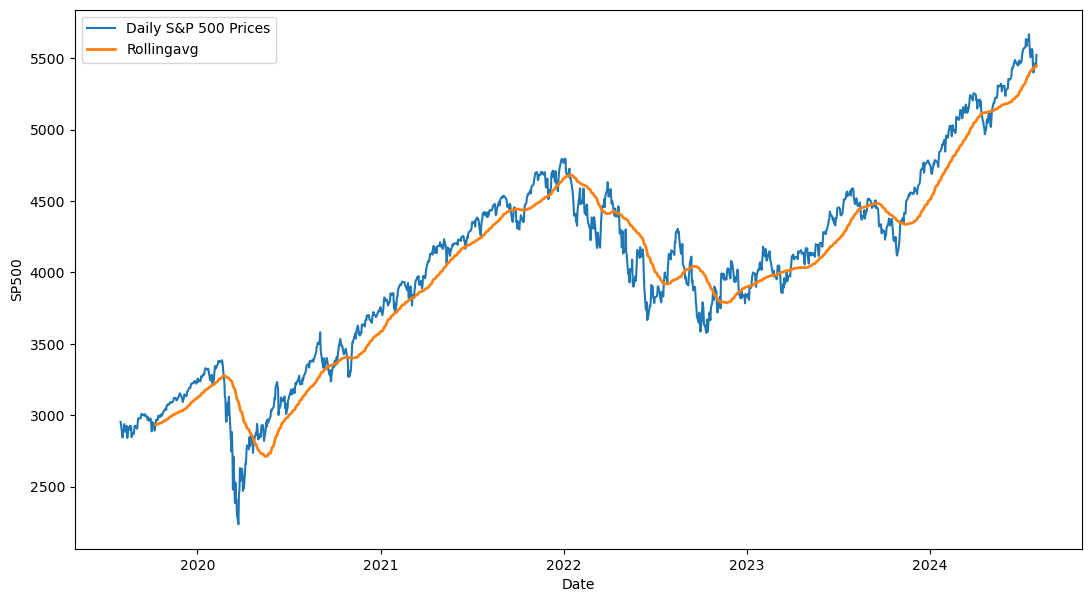

In [50]:
# Calculate the 50-day rolling average of the "SP500" column
prices["SP500 50 day_rolling_avg"] = prices.SP500.rolling(50).mean()

# set figure size and plot a simple time series plot using seaborn.lineplot()
plt.figure(figsize=(13, 7))
sns.lineplot(x="Date", y="SP500", data=prices, label="Daily S&P 500 Prices")

# plot rolling average
sns.lineplot(x="Date", y="SP500 50 day_rolling_avg", data=prices, label="Rollingavg", linewidth=2)
plt.show()

This visualization helps to smooth out short-term fluctuations in daily prices and highlight the longer-term trend of the S&P 500. The rolling average provides a clearer picture of the overall direction of the market.


#### **5.3 Rolling Distances**

We can create a volatility metric here using this moving average. Let's imagine we're taking the distance between the moving average line and each data point from the S&P 500 chart. We can use this as a proxy for volatility. We also would want to treat the negative differences the same as the positive differences; otherwise, they may cancel each other out. As such, we will use the absolute value of each point. We will divide these differences by the prices in order to standardize these values, and finally, we'll take the average of those values. This can be programmed in Python with this simple line:

In [51]:
((abs(prices - prices.rolling(50).mean())) / prices).mean()

Ticker
SP500                      0.037068
Russell2000                0.048725
SP500 50 day_rolling_avg   0.028209
dtype: float64

The result of this calculation provides a measure of how much, on average, the daily prices deviate from their 50-day rolling average, expressed as a percentage. This can be a useful indicator of the volatility or stability of the asset. Higher values suggest greater fluctuations around the rolling average, while lower values indicate more stable prices.

This is a different metric than the high/low metric we previously calculated, and it shows that the average deviation for the Russell 2000 is more volatile compared to the S&P 500. And the rolling average itself (SP500 50 day_rolling_avg) has an average deviation of 2.82%. This is expected as the rolling average is smoother than the daily prices.

These values can be useful for understanding the relative volatility of different assets and how much daily prices tend to deviate from their longer-term trends.


### **5.4 Price Volatility: Standard Deviations**

Standard deviation is potentially the most popular volatility metric used when looking at an investment opportunity. It's as simple as calling the `std()` method on a DataFrame.

In [52]:
prices.std()

Ticker
SP500                      685.682781
Russell2000                284.232353
SP500 50 day_rolling_avg   635.644388
dtype: float64

As mentioned before, calling this on the prices is not as intuitive as calling this on the returns since prices start at different points. For a better comparison, we will call this `std()` method on the daily returns of the last 5 years:

In [53]:
df.std()

Ticker
SP500         0.013458
Russell2000   0.017503
dtype: float64

Here again, the Russell 2000 has a slightly higher standard deviation than the S&P 500, suggesting that it has been more volatile over the last 5 years.


### **5.5 Writing a Volatility Comparison Function in Python**

To tie it all together, we're going to take the three volatility metrics we've used up to this point, along with average daily return, and write a function, which takes:

* `startTime` - `dateTime` format
* `endTime` - `dateTime` format
* `tickers` - a dictionary of values where the key is the yahoo ticker and the value is the display name i.e. {"^GSPC": "SP500", "^RUT": "Russell2000"}

By writing a function like this, it allows our research to be reproducible and applicable to many different parameters. In our case, it will be a date range and dictionary of tickers. If you were writing a serious application, you would need to have lots of error handling in this function, such as guaranteeing that parameters passed in are of the correct type. In our case, we will assume the data types of parameters are correct and that the date range is longer than 365 days.

In [54]:
def investCompare(startTime, endTime, tickers):
    # pull price data from yahoo -- (list(tickers.keys())) = ['^GSPC','^RUT']
    startTime = pd.Timestamp(startTime).tz_localize('UTC')
    endTime = pd.Timestamp(endTime).tz_localize('UTC')
    prices = yfin.download(list(tickers.keys()), startTime, endTime, auto_adjust = False)["Adj Close"]
    prices = prices.rename(columns=tickers)
    returns = np.log(prices) - np.log(prices.shift(1))
    returns = returns.iloc[1:, 0:]

    # pull data into separate DataFrame to just look at the last 365 days of
    # data for calculating our high/low metric
    currYear = prices.loc[(endTime - datetime.timedelta(365)).tz_convert(prices.index.tz) : endTime.tz_convert(prices.index.tz)]

    # High-Low
    highLow = (currYear.max() - currYear.min()) / prices.iloc[-1]
    highLow = pd.DataFrame(highLow, columns=["HighMinusLow"])

    # Moving average volatility
    MA = pd.DataFrame(
        ((abs(prices - prices.rolling(50).mean())) / prices).mean(),
        columns=["MovingAverageVolatility"],
    )
    investments = pd.merge(highLow, MA, left_index=True, right_index=True)

    # Standard deviation
    investments = pd.merge(
        investments,
        pd.DataFrame(returns.std(), columns=["StandardDeviation"]),
        left_index=True,
        right_index=True,
    )

    # Daily return
    investments = pd.merge(
        investments,
        pd.DataFrame(100 * returns.mean(), columns=["Daily Return Percentage"]),
        left_index=True,
        right_index=True,
    )

    # Format columns:
    # Hogh-Low column rounded to 5 decimal
    investments["HighMinusLow"] = investments["HighMinusLow"].round(4).astype(str)

    # MA, std and returns columns as percentage
    columns = ["MovingAverageVolatility", "StandardDeviation", "Daily Return Percentage"]
    for col in columns:
      investments[col] = (investments[col] * 100).round(3).astype(str) + '%'

    return investments

Here we also format values: High-Low values are rounded to 4 decimal places and the values in the 'MovingAverageVolatility,' 'StandardDeviation,' and 'Daily Return Percentage' columns are formatted as percentages with 3 decimal rounding, which is good practice to facilitate comparison.

### **5.6 Running Our Volatility Function**

We will start by calling our function with the two indices we've been examining thus far: the S&P 500 alongside the Russell 2000 Index. As we've seen, the three volatility metrics showed the Russell 2000 to be the more volatile investment. The average daily return is also higher for the S&P 500. Therefore, over the last 5 years, not only has the S&P 500 returned better than the Russell 2000, but it was also less volatile. Keep in mind that these different volatility metrics all calculate in some way how turbulently the stock has behaved in the past. This exercise was intended to demonstrate different ways of calculating volatility and how you can be a bit creative with it. This doesn't mean that volatility is constant or easily predictable, behaving the same way going forward; this exercise only reflects the past.

In [55]:
investCompare(
    datetime.date(2019, 8, 1),
    datetime.date(2024, 8, 1),
    {"^GSPC": "SP500", "^RUT": "Russell2000"},
)

[*********************100%***********************]  2 of 2 completed


,HighMinusLow,MovingAverageVolatility,StandardDeviation,Daily Return Percentage
Ticker,,,,
SP500,0.2806,3.707%,1.346%,4.978%
Russell2000,0.278,4.873%,1.75%,2.977%


This function gives us one clean space to compare investments in one line.

We also want to show that we made the function flexible in order to add symbols in the future. In the example below, we added Apple to the DataFrame in order to compare it to the other two indices.

In [56]:
investCompare(
    datetime.date(2019, 8, 1),
    datetime.date(2024, 8, 1),
    {"^GSPC": "SP500", "^RUT": "Russell2000", "AAPL": "Apple"},
)

[*********************100%***********************]  3 of 3 completed


,HighMinusLow,MovingAverageVolatility,StandardDeviation,Daily Return Percentage
Ticker,,,,
Apple,0.3154,6.462%,2.008%,11.816%
SP500,0.2806,3.707%,1.346%,4.978%
Russell2000,0.278,4.873%,1.75%,2.977%


These metrics show Apple to be a better investment in terms of daily return, but they also show that Apple is significantly more volatile than the two indices. This is expected, since the indices represent vast baskets of stocks. With many stocks moving in different directions, you'd expect the indices to be less volatile than an individual stock, even a blue-chip stock like Apple.

# **6. Comparing Growth vs. Value Stocks**

We can continue using the function we just wrote to examine and compare different categories of investments, starting here with growth vs. value stocks. As a proxy for growth stocks, we will use the Vanguard Growth ETF (VUG). VUG is one of the biggest growth ETFs with around \$87 billion in assets under management.

For value stocks, we will use the Vanguard Value ETF (VTV). VTV is the most prominent value ETF with \$88 billion in assets under management. As you may imagine by now, Vanguard is a popular purveyor of ETFs and has some of the lowest expense ratios in the industry.

In [57]:
# Set start and end dates
start = datetime.date(2022, 8, 1)
end = datetime.date(2024, 8, 1)

# Compute investments stats using investCompare() function
investCompare(start, end, {"VUG": "Growth", "VTV": "Value"})


[*********************100%***********************]  2 of 2 completed


,HighMinusLow,MovingAverageVolatility,StandardDeviation,Daily Return Percentage
Ticker,,,,
Value,0.2306,2.546%,0.825%,4.955%
Growth,0.3582,4.083%,1.284%,7.796%


Running `investCompare` over the last two years for these ETFs shows that growth stocks have clearly outperformed value stocks in terms of returns — but not without increased volatility.

We need to keep in mind that timeframes have a large influence on our results here. Let's take a look at the data since 2010:

In [58]:
# Set start and end dates
start = datetime.date(2010, 8, 1)
end = datetime.date(2024, 8, 1)

# Compute investments stats using investCompare() function
investCompare(start, end, {"VUG": "Growth", "VTV": "Value"})


[*********************100%***********************]  2 of 2 completed


,HighMinusLow,MovingAverageVolatility,StandardDeviation,Daily Return Percentage
Ticker,,,,
Value,0.2306,2.753%,1.043%,4.544%
Growth,0.3582,3.435%,1.224%,5.908%


Interestingly, compared to the previous analysis over a shorter timeframe, the differences in volatility and returns between Growth and Value seem to have narrowed slightly over this longer period. This could be due to the fact that, over the long term, the risk-return profiles of these investment styles are more balanced.



# **7. Comparing Domestic vs. Foreign Stocks**

We will use the S&P 500 once again for U.S. stocks while finding an ETF for the foreign stocks. There are tons of options to choose from in this space.

The first question you need to ask yourself is where do you want to invest? It could be emerging markets, Europe, China, etc. To make things simple, we will use one example that is specific to Europe, ETF: SPDR Portfolio Europe ETF (SPEU), and one example that is specific to China, ETF: SPDR S&P China ETF (GXC).

In [59]:
# Comparing Domestic vs. Foreign Stocks
start = datetime.date(2022, 8, 1)
end = datetime.date(2024, 8, 1)
investCompare(start, end,{"^GSPC": "SP500", "SPEU": "Europe ETF", "GXC": "China ETF"})


[*********************100%***********************]  3 of 3 completed


,HighMinusLow,MovingAverageVolatility,StandardDeviation,Daily Return Percentage
Ticker,,,,
China ETF,0.2629,4.816%,1.633%,-2.54%
Europe ETF,0.2324,3.378%,1.051%,5.511%
SP500,0.2806,2.985%,0.98%,5.842%


Key Takeaways:

 - The China ETF appears to be the most volatile and risky investment among the three, with a negative average daily return during this period.
 - The Europe ETF and the U.S. stocks show similar levels of volatility and positive returns, with the U.S. stocks having a slightly higher return.

Now, let's zoom out and look at the data since 2010, and we'll see the following:

In [60]:
# Comparing Domestic vs. Foreign Stocks
start = datetime.date(2010, 8, 1)
end = datetime.date(2024, 8, 1)
investCompare(start, end,{"^GSPC": "SP500", "SPEU": "Europe ETF", "GXC": "China ETF"})


[*********************100%***********************]  3 of 3 completed


,HighMinusLow,MovingAverageVolatility,StandardDeviation,Daily Return Percentage
Ticker,,,,
China ETF,0.2629,4.521%,1.567%,0.583%
Europe ETF,0.2324,3.241%,1.233%,2.13%
SP500,0.2806,2.884%,1.085%,4.515%


**Key Takeaways:**

 - Over this longer period, the U.S. equities appear to have provided the highest returns, followed by the Europe ETF and then the China ETF.
 - The China ETF, while still showing higher volatility, has a positive average daily return over the long term, unlike the negative return observed in the shorter timeframe analysis.

While considering longer timeframes is generally recommended for investment evaluation, it's not a universal rule and there are valid arguments against solely relying on long-term performance.

Here are some points we could argue:

 - Changing Market Dynamics: Long-term historical data might not accurately reflect current or future market conditions. Economic shifts, technological disruptions, heightened regulation, and geopolitical events can significantly impact investment performance, making past trends less relevant.
 - Investment Goals and Time Horizon: An investor with a shorter time horizon (e.g., saving for a down payment) might prioritize short-term performance over long-term trends. Their investment strategy and risk tolerance would differ from someone with a longer-term goal (e.g., retirement).
 - Missed Opportunities: Focusing solely on long-term trends might lead to missed opportunities in the short term. Active investors or traders might capitalize on short-term market fluctuations to generate returns, even if the long-term outlook is uncertain.
 - Survivorship Bias: Long-term data often suffers from survivorship bias, meaning it only includes companies or investments that have survived over time. This can create a distorted view of historical performance, as failed investments are not included in the analysis.

It's important to consider both short-term and long-term factors when evaluating investment performance. A balanced approach that incorporates your individual goals, risk tolerance, and the current market environment is crucial for making informed investment decisions.

# **8. Conclusion**

This lesson was a starting point for pulling in and analyzing price data in Python. We went into some specifics on different types of stocks and compared them using similar methods. We have also compared returns of different investment opportunities, and we used Python to illustrate different ways of calculating the volatility of investments. Keep these lessons in mind as we delve deeper into the connection between volatility and return in the next lesson. Up next, we'll expand this analysis by also taking into account the returns of different investments.

**References**

- Maginn, John L. *Managing Investment Portfolios Workbook: A Dynamic Process*. John Wiley & Sons, Inc., 2007.

- Standard & Poor's. *S&P U.S. Indices Methodology*. Nov. 2021, https://www.spglobal.com/spdji/en/documents/methodologies/methodology-sp-us-indices.pdf.

- Vanguard. "BLV Long-Term Bond ETF." https://institutional.vanguard.com/investments/product-details/fund/0927.

---
Copyright 2024 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
